<a href="https://colab.research.google.com/github/melodiw82/FoodClassification_DL/blob/main/FoodClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight

# Downloading The Dataset

In [ ]:
import gdown

file_id = '15CHt2ueS4c7emHpmzFHC3c0TGd51Mnvz'
output_file = '/content/train.zip'

if not os.path.exists(output_file):
    gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)

In [ ]:
import zipfile

zip_file_path = '/content/train.zip'
extract_dir = '/content/Data/'

if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

# Cleaning Corrupted Images

In [ ]:
train_dir = '/content/Data/train'

In [ ]:
subdirectories = [os.path.join(train_dir, d) for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
subdirectories

['/content/Data/train/chocolate_cake',
 '/content/Data/train/fish',
 '/content/Data/train/sushi',
 '/content/Data/train/omelette',
 '/content/Data/train/chicken',
 '/content/Data/train/hot_dog',
 '/content/Data/train/donuts',
 '/content/Data/train/eggs',
 '/content/Data/train/lasagna',
 '/content/Data/train/hamburger',
 '/content/Data/train/chicken_curry',
 '/content/Data/train/cheesecake',
 '/content/Data/train/steak',
 '/content/Data/train/ice_cream',
 '/content/Data/train/cheese_sandwich',
 '/content/Data/train/baklava',
 '/content/Data/train/falafel',
 '/content/Data/train/baked_potato',
 '/content/Data/train/pizza',
 '/content/Data/train/caesar_salad',
 '/content/Data/train/spaghetti',
 '/content/Data/train/french_fries']

In [ ]:
import PIL
from PIL import Image
import os

In [ ]:
# Identify and delete corrupted image in each of the folder file
for folder_path in subdirectories:
  for filename in os.listdir(folder_path):
      try:
          image = Image.open(os.path.join(folder_path, filename))
      except PIL.UnidentifiedImageError as e:
          print(f"Error in file {filename}: {e}")
          os.remove(os.path.join(folder_path, filename))
          print(f"Removed file {filename}")

Error in file 6fcf7983-225.jpg: cannot identify image file '/content/Data/train/chicken/6fcf7983-225.jpg'
Removed file 6fcf7983-225.jpg
Error in file 052f1133-141.jpg: cannot identify image file '/content/Data/train/chicken/052f1133-141.jpg'
Removed file 052f1133-141.jpg
Error in file 2a2a3166-2d2.jpg: cannot identify image file '/content/Data/train/chicken/2a2a3166-2d2.jpg'
Removed file 2a2a3166-2d2.jpg
Error in file e5574159-a60.jpg: cannot identify image file '/content/Data/train/chicken/e5574159-a60.jpg'
Removed file e5574159-a60.jpg
Error in file 1b4ed8be-285.jpg: cannot identify image file '/content/Data/train/chicken/1b4ed8be-285.jpg'
Removed file 1b4ed8be-285.jpg


# Creating The DataFrame

In [ ]:
categories = sorted(os.listdir(train_dir))
categories

['baked_potato',
 'baklava',
 'caesar_salad',
 'cheese_sandwich',
 'cheesecake',
 'chicken',
 'chicken_curry',
 'chocolate_cake',
 'donuts',
 'eggs',
 'falafel',
 'fish',
 'french_fries',
 'hamburger',
 'hot_dog',
 'ice_cream',
 'lasagna',
 'omelette',
 'pizza',
 'spaghetti',
 'steak',
 'sushi']

In [ ]:
df = pd.DataFrame(columns=['image_path', 'label'])
df

,image_path,label


In [ ]:
dfs = []

for category in categories:
    category_path = os.path.join(train_dir, category)
    image_data = []
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)

In [ ]:
df = pd.concat(dfs, ignore_index=True)
df

,image_path,label
0,/content/Data/train/baked_potato/c4412104-f6f.jpg,baked_potato
1,/content/Data/train/baked_potato/1fd0738f-bdf.jpg,baked_potato
2,/content/Data/train/baked_potato/0363515e-68a.jpg,baked_potato
3,/content/Data/train/baked_potato/d85fa322-add.jpg,baked_potato
4,/content/Data/train/baked_potato/58114221-b73.jpg,baked_potato
...,...,...
24079,/content/Data/train/sushi/b8b9900e-0d8.jpg,sushi
24080,/content/Data/train/sushi/248b009f-c36.jpg,sushi
24081,/content/Data/train/sushi/fca0506f-e89.jpg,sushi
24082,/content/Data/train/sushi/080d98cf-c34.jpg,sushi


In [ ]:
# df['label'].value_counts()

donuts             2395
hamburger          2376
chicken            2288
french_fries       2286
spaghetti          1509
baked_potato       1501
hot_dog            1057
pizza               887
omelette            715
caesar_salad        709
falafel             709
fish                708
cheese_sandwich     708
chicken_curry       707
ice_cream           705
chocolate_cake      702
eggs                699
lasagna             693
sushi               690
steak               681
baklava             680
cheesecake          679
Name: label, dtype: int64

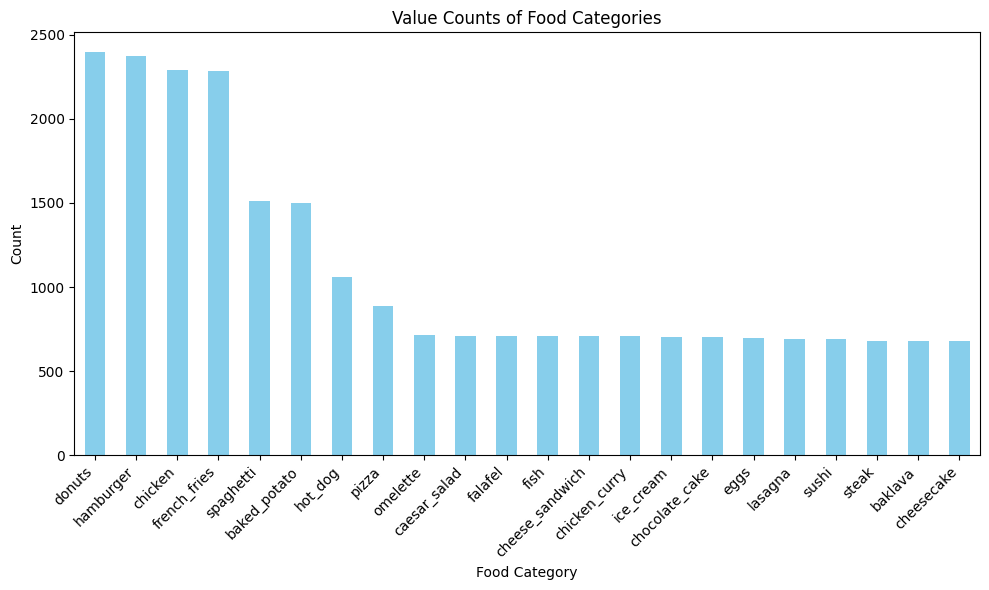

In [ ]:
plt.figure(figsize=(10, 6))

df['label'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Food Category')
plt.ylabel('Count')
plt.title('Value Counts of Food Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The dataset shows class imbalance, where some food categories have many more samples than others. For example, "donuts" and "hamburger" have lots of samples, while "steak" or "cheesecake" have much fewer.

### Computing class weights

In [ ]:
labels = df['label']

In [ ]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)

In [ ]:
class_weight_dict = dict(zip(np.unique(labels), class_weights))

In [ ]:
print("Class Weights:", class_weight_dict)

Class Weights: {'baked_potato': 0.7294833747198837, 'baklava': 1.6102272727272726, 'caesar_salad': 1.5443646621361713, 'cheese_sandwich': 1.5465459681561375, 'cheesecake': 1.612598741464721, 'chicken': 0.47752051698846293, 'chicken_curry': 1.5487334447730488, 'chocolate_cake': 1.5597643097643097, 'donuts': 0.45718352628582276, 'eggs': 1.566458577188191, 'falafel': 1.5443646621361713, 'fish': 1.5465459681561375, 'french_fries': 0.4789827407937644, 'hamburger': 0.46083945515763697, 'hot_dog': 1.035907800808463, 'ice_cream': 1.5531270148291425, 'lasagna': 1.5800209891118981, 'omelette': 1.531404958677686, 'pizza': 1.2344470636466127, 'spaghetti': 0.7256160009639135, 'steak': 1.60786276865572, 'sushi': 1.5868906455862977}


# Train_Test Split

In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train_df.shape

(19267, 2)

In [ ]:
val_df.shape

(4817, 2)

# Image Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
val_datagen = ImageDataGenerator(
    rescale = 1./255
    )

In [ ]:
img_size = (224, 224)

In [ ]:
batch_size = 32

In [ ]:
train_images = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=True,
    seed=42,
    class_mode='categorical'
)

Found 19267 validated image filenames belonging to 22 classes.


In [ ]:
val_images = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=False,
    seed=42,
    class_mode='categorical'
)

Found 4817 validated image filenames belonging to 22 classes.


# Visualize Some Images From Different Categories

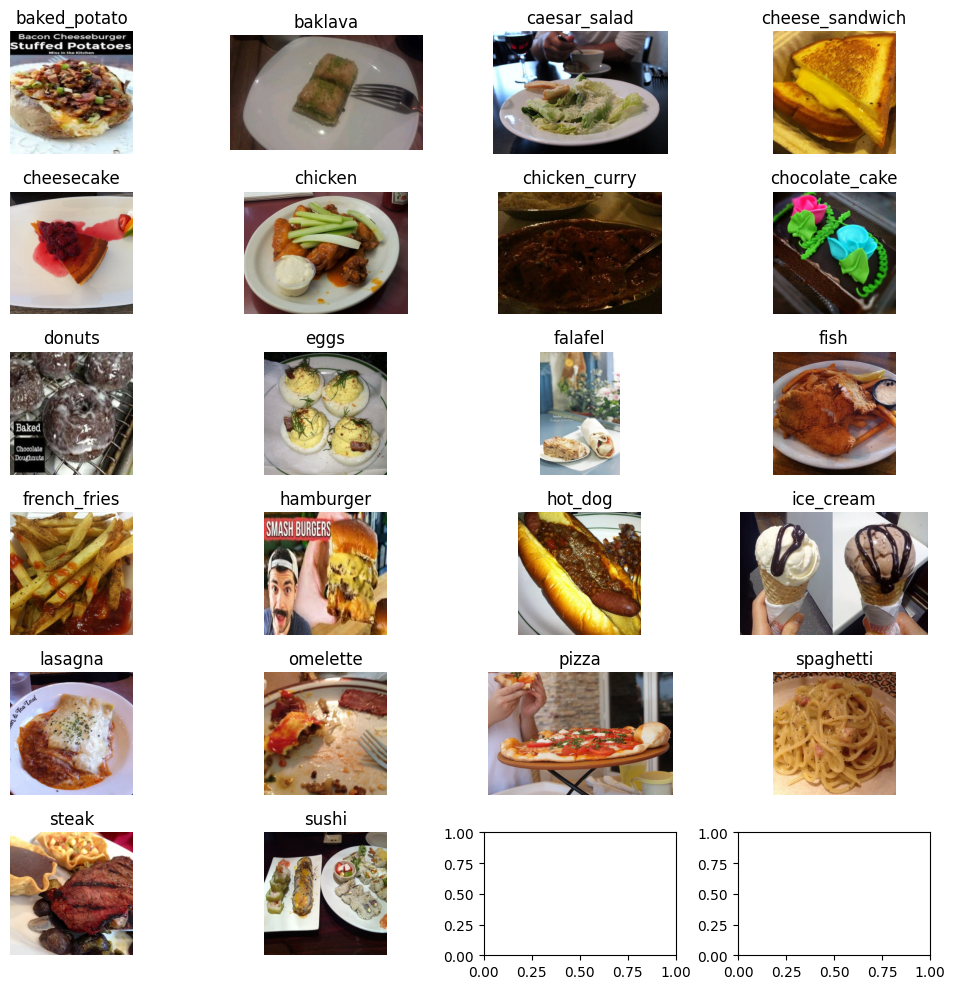

In [ ]:
fig, axes = plt.subplots(6, 4, figsize=(10, 10))
axes = axes.flatten()

for i, category in enumerate(categories):
    category_df = train_df[train_df['label'] == category]
    image_path = category_df.iloc[100]['image_path']
    img = plt.imread(image_path)
    axes[i].imshow(img)
    axes[i].set_title(category)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

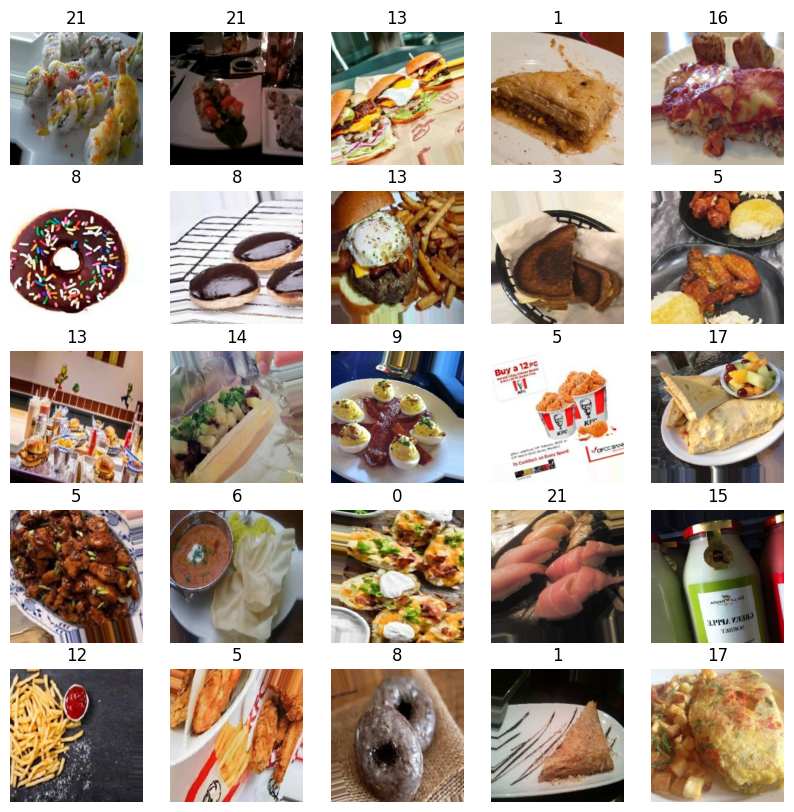

In [ ]:
batch_train_images, batch_train_labels = next(train_images)

class_names = np.argmax(batch_train_labels, axis=1)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(batch_train_images[i])
    plt.title(class_names[i])
    plt.axis('off')
plt.show()

# VGG

In [ ]:
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

for layer in vgg_model.layers:
    layer.trainable = False

x = Flatten()(vgg_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(categories), activation='softmax')(x)

model = Model(inputs=vgg_model.input, outputs=predictions, name='VGG16')

model.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images,
                    steps_per_epoch=train_images.samples // batch_size,
                    epochs=10,
                    validation_data=val_images,
                    validation_steps=val_images.samples // batch_size)

Epoch 1/10
602/602 [==============================] - 305s 505ms/step - loss: 2.0565 - accuracy: 0.4228 - val_loss: 1.5870 - val_accuracy: 0.5356
Epoch 2/10
602/602 [==============================] - 303s 503ms/step - loss: 1.4944 - accuracy: 0.5543 - val_loss: 1.3745 - val_accuracy: 0.6000
Epoch 3/10
602/602 [==============================] - 287s 477ms/step - loss: 1.3536 - accuracy: 0.5959 - val_loss: 1.4016 - val_accuracy: 0.5923
Epoch 4/10
602/602 [==============================] - 286s 474ms/step - loss: 1.2662 - accuracy: 0.6199 - val_loss: 1.3292 - val_accuracy: 0.6121
Epoch 5/10
602/602 [==============================] - 306s 509ms/step - loss: 1.1998 - accuracy: 0.6411 - val_loss: 1.3842 - val_accuracy: 0.6027
Epoch 6/10
602/602 [==============================] - 306s 507ms/step - loss: 1.1630 - accuracy: 0.6462 - val_loss: 1.3169 - val_accuracy: 0.6200
Epoch 7/10
602/602 [==============================] - 290s 482ms/step - loss: 1.1309 - accuracy: 0.6554 - val_loss: 1.3412 -

In [ ]:
# model.save('/content/models/vgg16', save_format='tf')

In [ ]:
# val_loss, val_acc = model.evaluate(val_images, verbose=0)

In [ ]:
# val_loss

In [ ]:
# val_acc

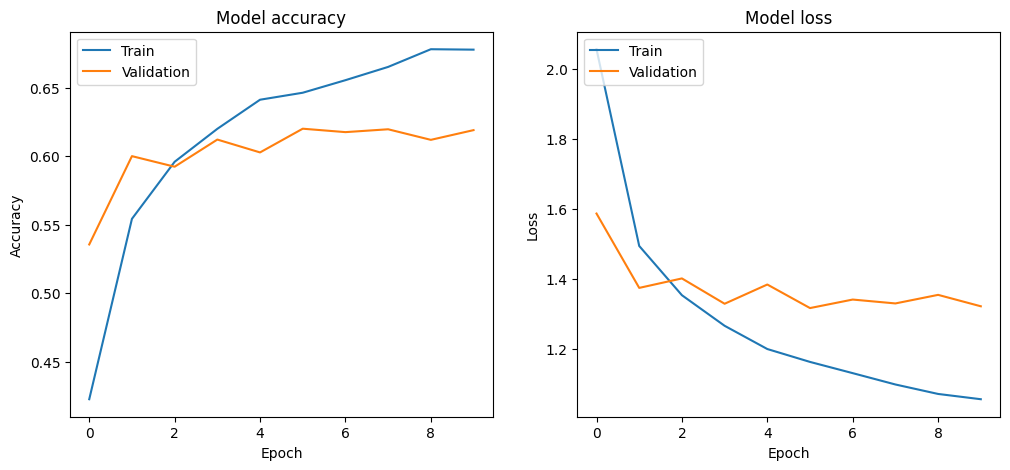

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# MobileNet

In [ ]:
pretrained_model = MobileNetV2(
    input_shape=(img_size[0], img_size[1], 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)
outputs = Dense(len(categories), activation='softmax')(x)

model_mn = Model(pretrained_model.input, outputs, name='MobileNetV2')

print(model_mn.summary())

9406464/9406464 [==============================] - 1s 0us/step
Model: "MobileNetV2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)       

In [ ]:
model_mn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history_mn = model_mn.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
603/603 [==============================] - 268s 433ms/step - loss: 1.1610 - accuracy: 0.6587 - val_loss: 0.8492 - val_accuracy: 0.7490
Epoch 2/100
603/603 [==============================] - 254s 422ms/step - loss: 0.8197 - accuracy: 0.7527 - val_loss: 0.8403 - val_accuracy: 0.7484
Epoch 3/100
603/603 [==============================] - 259s 429ms/step - loss: 0.7416 - accuracy: 0.7728 - val_loss: 0.7824 - val_accuracy: 0.7656
Epoch 4/100
603/603 [==============================] - 256s 425ms/step - loss: 0.6667 - accuracy: 0.7917 - val_loss: 0.7848 - val_accuracy: 0.7677
Epoch 5/100
603/603 [==============================] - 256s 425ms/step - loss: 0.6131 - accuracy: 0.8107 - val_loss: 0.8053 - val_accuracy: 0.7667
Epoch 6/100
603/603 [==============================] - 270s 449ms/step - loss: 0.5892 - accuracy: 0.8157 - val_loss: 0.8459 - val_accuracy: 0.7606
Epoch 7/100
603/603 [==============================] - 255s 423ms/step - loss: 0.5492 - accuracy: 0.8268 - val_loss: 0

In [ ]:
model_mn.save('/content/models/MobileNetV2', save_format='tf')

In [ ]:
val_loss_mn, val_acc_mn = model_mn.evaluate(val_images, verbose=0)

In [ ]:
val_loss_mn

0.7615085244178772

In [ ]:
val_acc_mn

0.7772472500801086

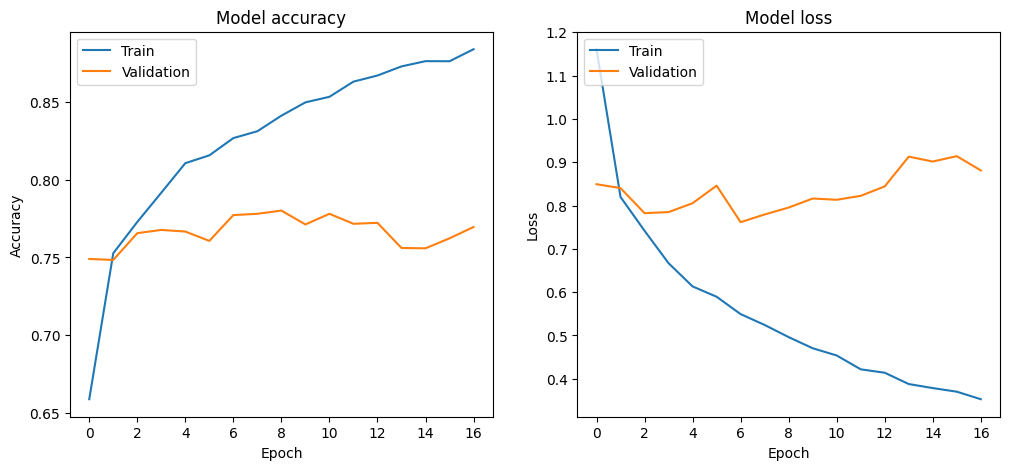

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_mn.history['accuracy'])
plt.plot(history_mn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_mn.history['loss'])
plt.plot(history_mn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()